In [ ]:
# !pip install lime
# !pip install shap
# !pip install eli5
# !pip install yellowbrick
# !pip install lightgbm
# !pip install tensorflow
# https://github.com/oracle/Skater#install-skater

Library Dependencies

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randint
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.regressor import PredictionError, ResidualsPlot
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import learning_curve, ShuffleSplit


# **Data Cleaning/Exploratory Analysis**






For this project, we am using a dataset called laptop_dataset(.csv)

The dataset contains 11 features and 1303 instances of laptops. The 11th column is the Price of the Laptops observed.

In this step we are going to load the laptop data from as CSV file into the local environment.

In [ ]:
names = ['Brand', 'Type', 'Inches', 'Resolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']
df = pd.read_csv('laptop_data.csv', names=names, header=0)

**Check the Data**

In [ ]:
df.head()

Brand       Type  Inches                          Resolution  \
0  Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1  Apple  Ultrabook    13.3                            1440x900   
2     HP   Notebook    15.6                   Full HD 1920x1080   
3  Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4  Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [ ]:
#Summary for null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       1303 non-null   object 
 1   Type        1303 non-null   object 
 2   Inches      1303 non-null   float64
 3   Resolution  1303 non-null   object 
 4   Cpu         1303 non-null   object 
 5   Ram         1303 non-null   object 
 6   Memory      1303 non-null   object 
 7   Gpu         1303 non-null   object 
 8   OpSys       1303 non-null   object 
 9   Weight      1303 non-null   object 
 10  Price       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


No null values.

In [ ]:
# Summary statistics
print(df.describe())

            Inches          Price
count  1303.000000    1303.000000
mean     15.017191   59870.042910
std       1.426304   37243.201786
min      10.100000    9270.720000
25%      14.000000   31914.720000
50%      15.600000   52054.560000
75%      15.600000   79274.246400
max      18.400000  324954.720000


**Univariate Analysis**

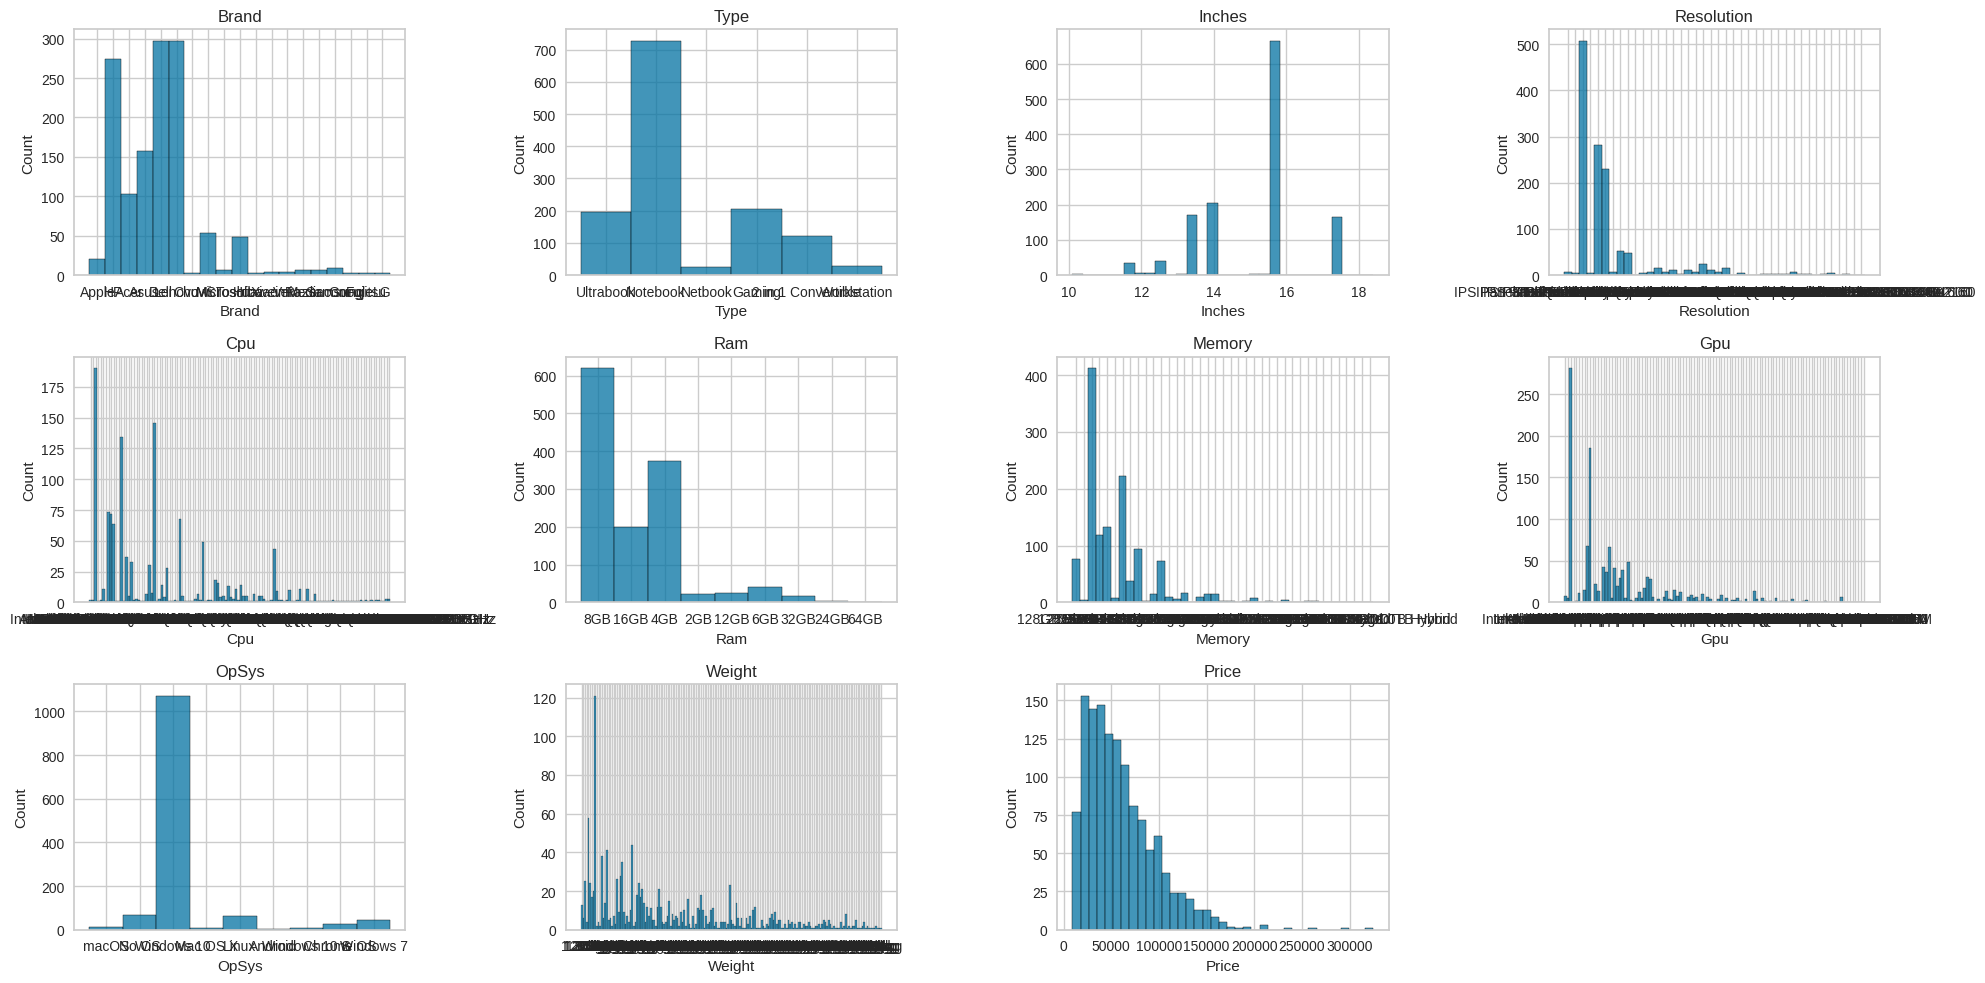

In [ ]:
#An initial view of each variables distribution
rows = 3
cols = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))

col = df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        if index < len(col):
            sns.histplot(df[col[index]], ax=ax[i][j])
            ax[i][j].set_title(col[index])
            index += 1
        else:
            ax[i][j].set_visible(False)
plt.tight_layout()
plt.show()

**Multivariate Analysis**

In [ ]:
# # corrmat = df.corr()
# # corrmat
# plt.figure(figsize=(15,5))
# sns.heatmap(corrmat, annot=True, cmap='coolwarm')
# plt.show()

**Pairplot**

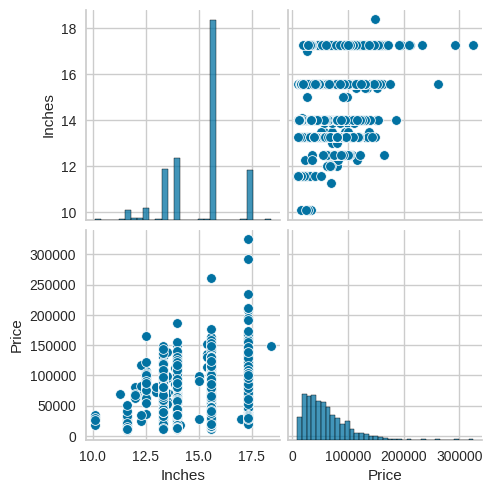

<Figure size 500x300 with 0 Axes>

In [ ]:
import seaborn as sns
sns.pairplot(df)
plt.figure(figsize=(5,3))
plt.show()

Only price and inches are numerical values

In [ ]:
names

[['Brand',
  'Type',
  'Inches',
  'Resolution',
  'Cpu',
  'Ram',
  'Memory',
  'Gpu',
  'OpSys',
  'Weight',
  'Price']]

How does Brand influence the price

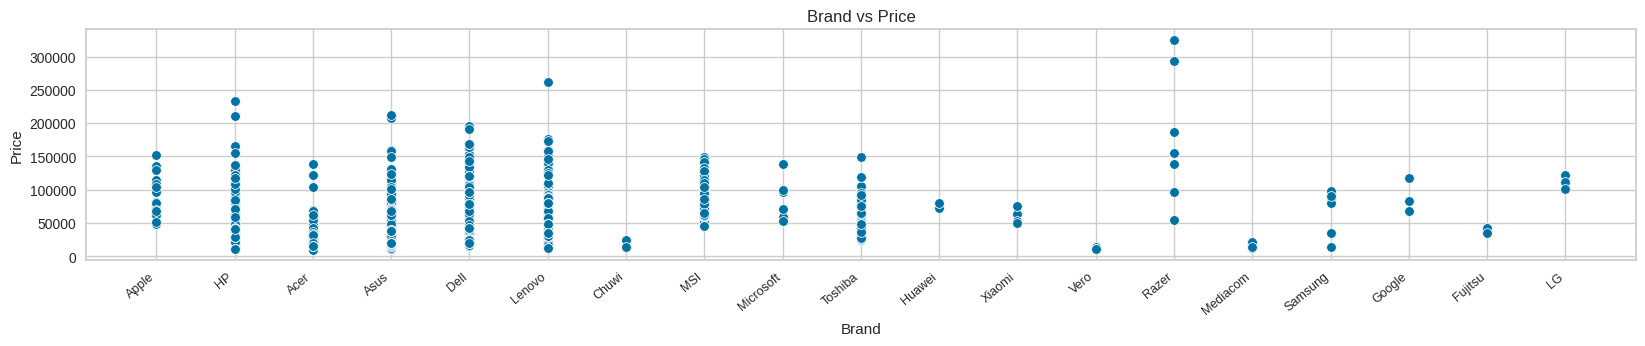

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Brand'], y=df['Price'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=9)
plt.title('Brand vs Price')
print()

What Type of Laptop are you looking for

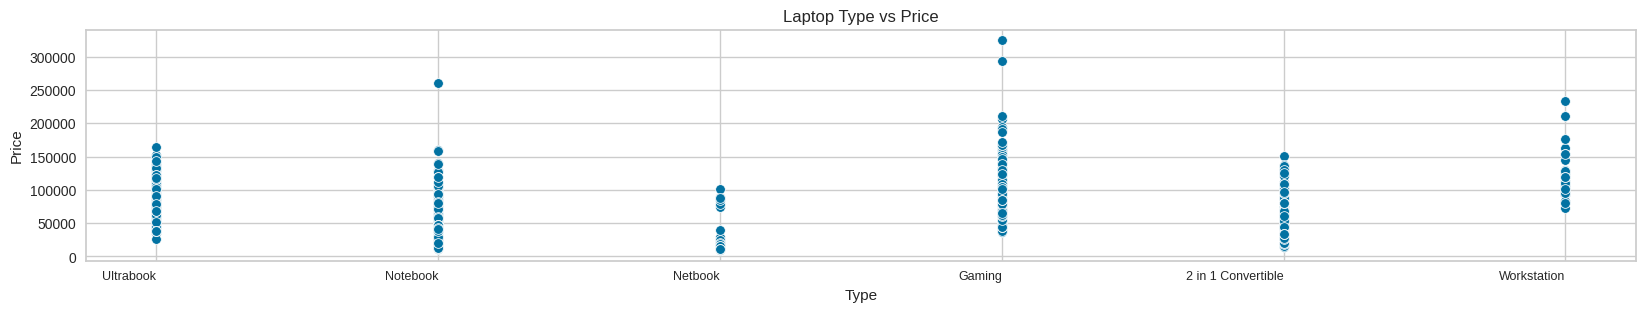

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Type'], y=df['Price'])
plt.xticks(rotation=0, horizontalalignment='right', fontsize=9)
plt.title('Laptop Type vs Price')
print()

How does the Inch size influence the laptop price

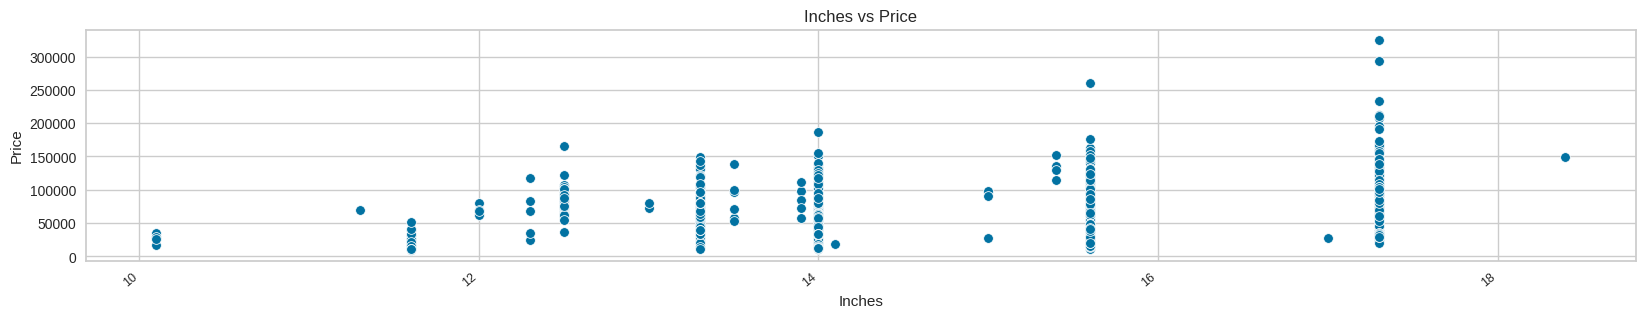

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=9)
plt.title('Inches vs Price')
print()

Different Resolutions against the Prices

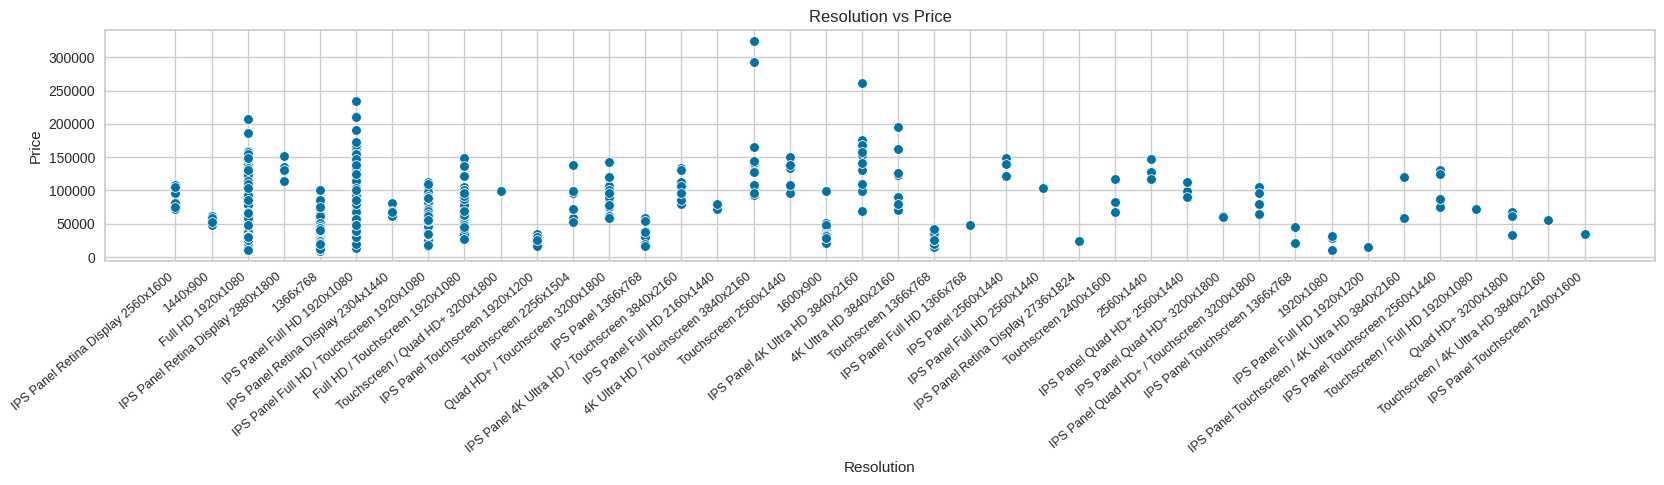

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Resolution'], y=df['Price'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=9)
plt.title('Resolution vs Price')
print()

CPU types vs Price

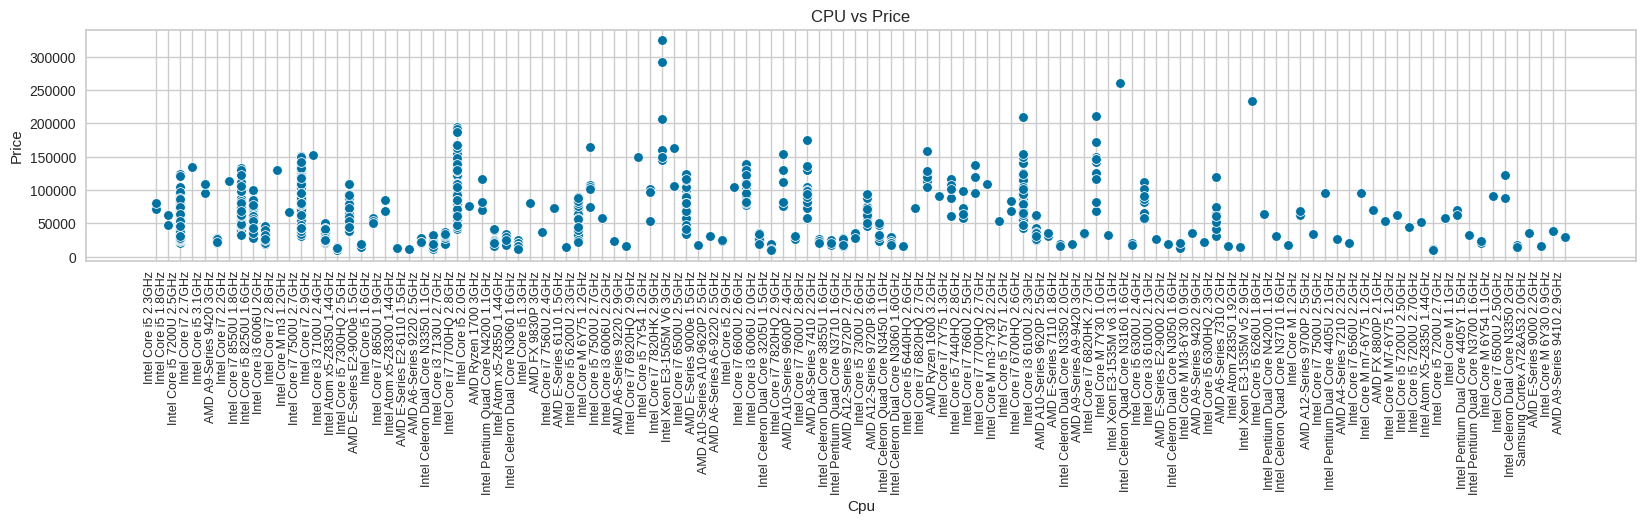

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Cpu'], y=df['Price'])
plt.xticks(rotation=90, horizontalalignment='right', fontsize=9)
plt.title('CPU vs Price')
print()

RAM vs Price

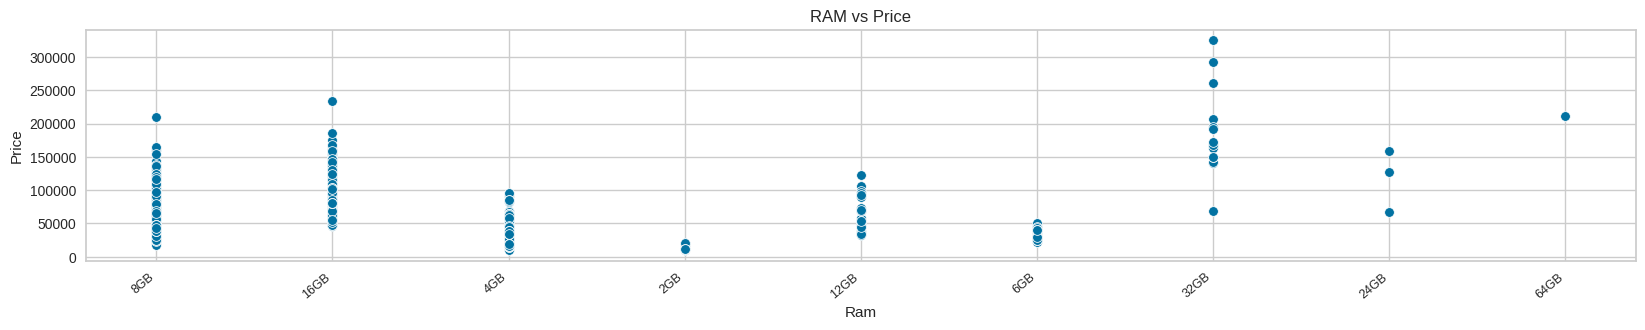

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=9)
plt.title('RAM vs Price')
print()

Memory size vs Price

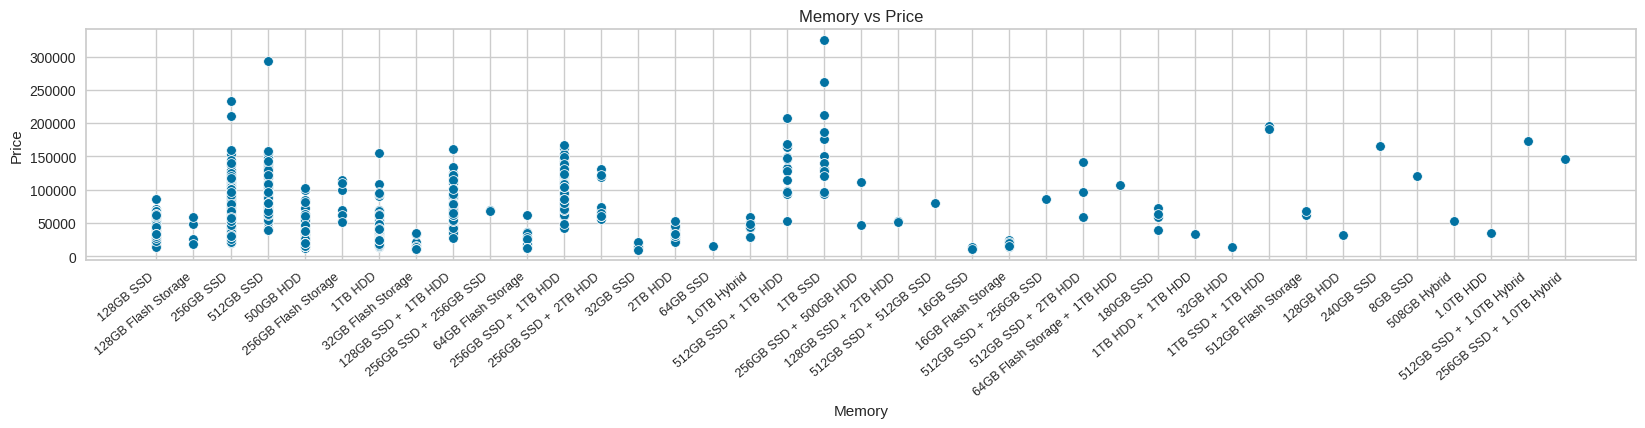

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Memory'], y=df['Price'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=9)
plt.title('Memory vs Price')

print()

GPU vs Price

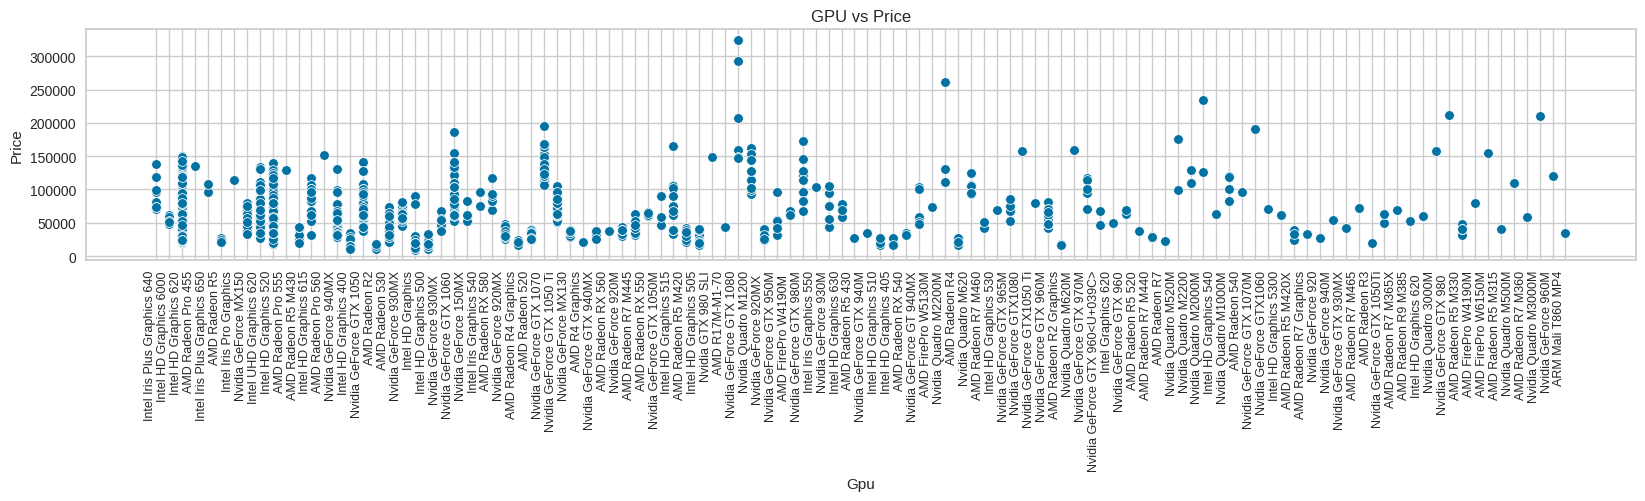

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Gpu'], y=df['Price'])
plt.xticks(rotation=90, horizontalalignment='right', fontsize=9)
plt.title('GPU vs Price')
print()

Operating Systems vs Price

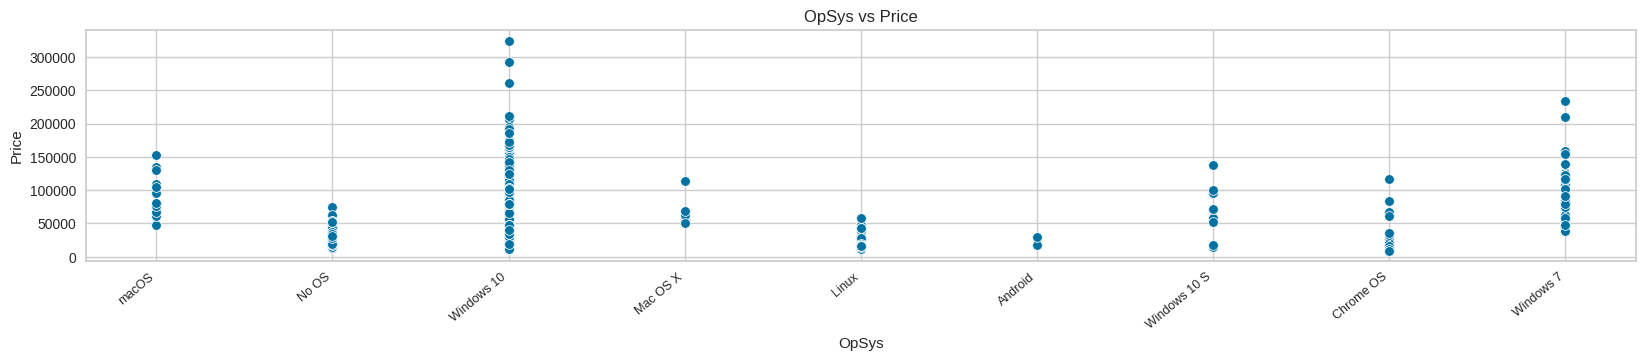

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation=40, horizontalalignment='right', fontsize=9)
plt.title('OpSys vs Price')
print()

Weights vs Price

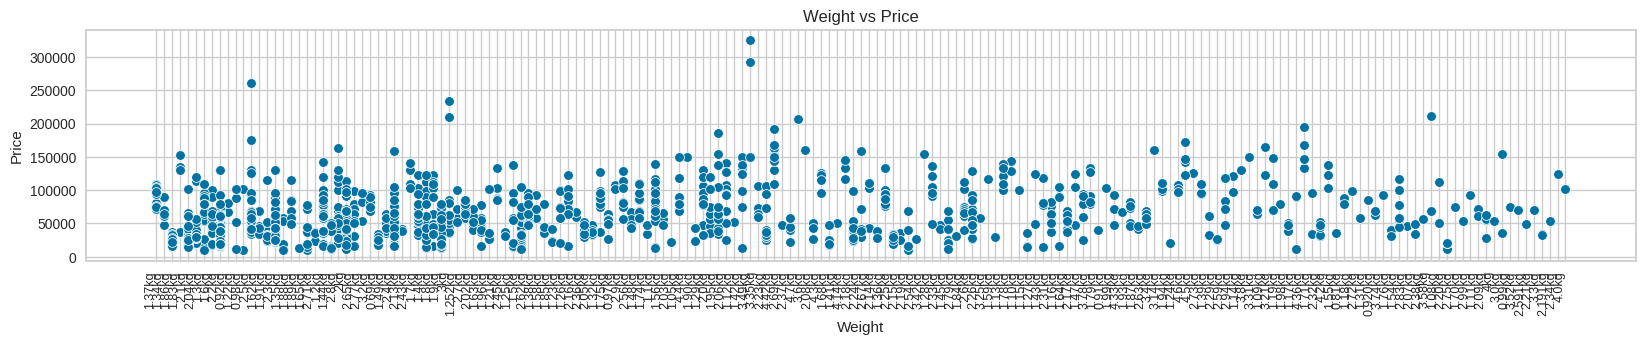

In [ ]:
plt.figure(figsize=(20,3))
sns.scatterplot(x=df['Weight'], y=df['Price'])
plt.xticks(rotation=90, horizontalalignment='right', fontsize=9)
plt.title('Weight vs Price')
print()

#**Preprocessing/Feature Engineering**


Common preprocessing tasks to address these include to remove any duplicates and missing values from the dataframe, transform categorical features (Brand, Type, Resolution, Cpu, Memory, Gpu, OpSys) into numerical features using one-hot encoding and scale and normalize numerical features (Inches, Ram, Weight) to a common range to avoid any potential scaling issues.

To achieve the best possible prediction performance in a regression problem, linear models assume that for the independent variables X, used to predict Y(Prices).
1. There is a linear relationship between X and Y.
2. The independent variables X are normally distributed
3. There is no co-linearity among the independent variables
4. No Homoscedasticity (homogenety of variance)




In [ ]:
df.keys()

Index(['Brand', 'Type', 'Inches', 'Resolution', 'Cpu', 'Ram', 'Memory', 'Gpu',
       'OpSys', 'Weight', 'Price'],
      dtype='object')

Feature engineering involves transforming existing features or create new features that are more informative for use in prediction.

This is important as some original features are too noisy or not good enough to work with.

**Price / RAM / Weight**

In [ ]:
df['Price'] = round(df['Price']/100, 2)                               #covert price from INR to GBP
df['Ram'] = (df['Ram'].str.replace('GB','')).astype('int32')          #Remove the string units
df['Weight'] = (df['Weight'].str.replace('kg','')).astype('float32')  #Remove the string units

**Brand**

In [ ]:
df.Brand.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Brand, dtype: int64

In [ ]:
#Grouping fewer Brands into 'Others' bin
ø = 20 #minimum value
min = df['Brand'].value_counts()[df['Brand'].value_counts() < ø].index.tolist()
df['Brand'] = df['Brand'].replace(min, 'Others')

#One-Hot Encoding
df = df.join(pd.get_dummies(df['Brand']))

#Drop column
df.drop('Brand', axis=1, inplace=True)

**Type**

In [ ]:
df.Type.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: Type, dtype: int64

In [ ]:
#One-Hot Encoding
df = df.join(pd.get_dummies(df['Type']))
#Drop column
df.drop('Type', axis=1, inplace=True)

**OpSys**

Grouping common OS groups into shared bins

In [ ]:
#Reducing common op sys to similar bins
df['OS Group'] = df['OpSys'].apply(lambda x: 'Windows OS' if 'Windows' in x
                                   else 'Mac OS' if 'Mac' in x or 'macOS' in x else 'Linux OS' if 'Linux' in x
                                   else 'No OS' if 'No OS' in x else 'Others OS')

#One-Hot Encoding
df = df.join(pd.get_dummies(df['OS Group']))

#Drop columns
df.drop('OpSys', axis=1, inplace=True)
df.drop('OS Group', axis=1, inplace=True)

**Resolution**

Resolution contains a lot of information like TouchScreen on IPS.
It also contains resolution dimension. but this is generally not fit for us in the model so we derive Pixels Per Inch (ppi).

In [ ]:
#if either "touchscreen or "Ips" is in resolution desc
df['Touchscreen'] = df['Resolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['Resolution'].apply(lambda x:1 if 'IPS' in x else 0)

#Seperate Resolution height and width (- calculate ppi)
df['Resolution'] = df.Resolution.str.split(" ").apply(lambda x: x[-1])
df['Pixel Width'] = df.Resolution.str.split("x").apply(lambda x: x[0]).astype('int32')
df['Pixel Height'] = df.Resolution.str.split("x").apply(lambda x: x[1]).astype('int32')
df['ppi'] = round(np.sqrt((df['Pixel Width']**2 + df['Pixel Height']**2) / df['Inches'].astype('float32')),1)

#Drop column
df.drop('Resolution', axis=1, inplace=True)
df.drop('Pixel Width', axis=1, inplace=True)
df.drop('Pixel Height', axis=1, inplace=True)

**Inches**

Inches values are rounded up to common bins to reduce dimensionality while preserving their weight.

In [ ]:
df.Inches.value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [ ]:
#Rounding various Inches to 'Screensize'.
df['Screensize'] = np.round(df['Inches']).astype('int32')

#Drop column
df.drop('Inches', axis=1, inplace=True)

**Memory**

Memory contains a lot of noisy information about the Type and Size capacity of the laptop. It also includes different units of measurement on different scales i.e GB or TB

In [ ]:
# #Extract the 'Memory Size' and 'Memory Type'
df['Memory'] = df.Memory.astype(str).replace('\.0', '', regex = True) #remove any decimals
df['Memory'] = df.Memory.str.replace('GB','') #Replace GB to ''(empty)
df['Memory'] = df.Memory.str.replace('TB','000') #Replace TB to '000'. 1TB = 1000 (GB)

df['Memory Size (GB)'] = df.Memory.str.split(" ").apply(lambda x: x[0]).astype('int32')
df['Memory Type'] = df.Memory.str.split(" ").apply(lambda x: x[1])

#One-Hot Encoding
df = df.join(pd.get_dummies(df['Memory Type']))

#Drop column
df.drop('Memory', axis=1, inplace=True)
df.drop('Memory Type', axis=1, inplace=True)

**CPU**

CPU contains lots of information like the processors. The processors also have different clock speeds

In [ ]:
df['CPU Model'] = df.Cpu.str.split(" ").apply(lambda x: x[0])                 #extract first value
df['CPU Clock Speed'] = df.Cpu.str.split(" ").apply(lambda x: x[-1])          #extract last value
df['CPU Clock Speed'] = (df['CPU Clock Speed'].str[:-3]).astype('float32')    #removing unit (GHZ)

#One-Hot Encoding
cpu_categories = pd.get_dummies(df['CPU Model'])
cpu_categories.columns = [col+'_CPU' for col in cpu_categories.columns]       #Intel occurs in both Cpu and Gpu
df = df.join(cpu_categories)

#Drop column
df.drop('Cpu', axis=1, inplace=True)
df.drop('CPU Model', axis=1, inplace=True)

**GPU**

GPU also contains many categories that need to be seperated including the GPU type

In [ ]:
df['Gpu Model'] = df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu Model'].value_counts()

#Intel occurs in both Cpu and Gpu -
gpu_categories = pd.get_dummies(df['Gpu Model'])
gpu_categories.columns = [col+'_Gpu' for col in gpu_categories.columns] #Intel occurs in both Cpu and Gpu
df = df.join(gpu_categories)

#Drop column
df.drop('Gpu', axis=1, inplace=True)
df.drop('Gpu Model', axis=1, inplace=True)

In [ ]:
df.head()

Ram  Weight    Price  Acer  Apple  Asus  Dell  HP  Lenovo  MSI  ...  \
0    8    1.37   713.79     0      1     0     0   0       0    0  ...   
1    8    1.34   478.96     0      1     0     0   0       0    0  ...   
2    8    1.86   306.36     0      0     0     0   1       0    0  ...   
3   16    1.83  1351.95     0      1     0     0   0       0    0  ...   
4    8    1.37   960.96     0      1     0     0   0       0    0  ...   

   Hybrid  SSD  CPU Clock Speed  AMD_CPU  Intel_CPU  Samsung_CPU  AMD_Gpu  \
0       0    1              2.3        0          1            0        0   
1       0    0              1.8        0          1            0        0   
2       0    1              2.5        0          1            0        0   
3       0    1              2.7        0          1            0        1   
4       0    1              3.1        0          1            0        0   

   ARM_Gpu  Intel_Gpu  Nvidia_Gpu  
0        0          1           0  
1        0          1           0  
2        0          1           0  
3        0          0           0  
4        0          1           0  

[5 rows x 40 columns]

In [ ]:
# df = df.drop(columns=['Brand','Type','Inches','Resolution','Cpu','Memory','Gpu','OpSys',
#                       'Pixel Width','Pixel Height','OS Group','CPU Model','Gpu Model','Memory Type'])

#**Feature Selection**
  


Feature selection is reducing the number of input features.It is important as it can possibly improve the performance of a model and reduce computational cost.

Here I consider 3 feature selection techniques and perform a bench test with Linear Regression, Decision tree and Random Forest.




### **Recursive Feature Elimination**

Split data

In [ ]:
# Split the data into training and test sets
target = df['Price']
data = df.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


**Bench test**

Import RFE (Recursive Feature Elimination) from sklearn

In [ ]:
from sklearn.feature_selection import RFE
# define feature selection models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

models = [lr, rf, dt] # create a list of models

# create a list to store the selected features for each model
selected_features = []

# create an RFE object and specify the number of features to select
for model in models:
    rfe = RFE(model, n_features_to_select=15)

    # fit the RFE object to the training data
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    # fit regression models and make predictions
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(rfe.transform(X_test))

    # evaluate the performance using r2 score
    score = r2_score(y_test, y_pred)

    # get the selected features
    selected_features.append(X_train.columns[rfe.support_])

    # print scores
    #print(model.__class__.__name__, "Model Selected Features: ", selected_features[-1])
    print(model.__class__.__name__, "R2 Score: ", score)


LinearRegression R2 Score:  0.5245690799859595
RandomForestRegressor R2 Score:  0.8142333083075174
DecisionTreeRegressor R2 Score:  0.6508976742629593


The algorithms performed best between 15 to 20 features with very little improvement across that range. To manage dimentionality I went with 15 features.

### **Principal Component Analysis**

In [ ]:
from sklearn.decomposition import PCA

# Define the PCA model
pca = PCA()

# Fit the PCA model on the training data
pca.fit(X_train)

# Transform the training and testing sets using the fitted PCA model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the regression models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

# Define the number of principal components to use
n_components = [5,10,15,20]

# Train and evaluate each model for each number of principal components
for n in n_components:
    # Select the top n principal components
    X_train_pca_n = X_train_pca[:, :n]
    X_test_pca_n = X_test_pca[:, :n]

    # Train and evaluate the linear regression
    lr.fit(X_train_pca_n, y_train)
    y_pred = lr.predict(X_test_pca_n)
    r2 = r2_score(y_test, y_pred)
    print(f"Linear Regression with {n} principal components: R2 = {r2}")

    # Train and evaluate the decision tree regression
    dt.fit(X_train_pca_n, y_train)
    y_pred = dt.predict(X_test_pca_n)
    r2 = r2_score(y_test, y_pred)
    print(f"Random Forest Regression with {n} principal components: R2 = {r2}")


    # Train and evaluate the random forest regression
    rf.fit(X_train_pca_n, y_train)
    y_pred = rf.predict(X_test_pca_n)
    r2 = r2_score(y_test, y_pred)
    print(f"Decision Tree Regression with {n} principal components: R2 = {r2}")



Linear Regression with 5 principal components: R2 = 0.6378181098987357
Random Forest Regression with 5 principal components: R2 = 0.6247421817285455
Decision Tree Regression with 5 principal components: R2 = 0.7281537550601416
Linear Regression with 10 principal components: R2 = 0.6792091782932732
Random Forest Regression with 10 principal components: R2 = 0.55542136155146
Decision Tree Regression with 10 principal components: R2 = 0.7272512416652747
Linear Regression with 15 principal components: R2 = 0.6883437740258207
Random Forest Regression with 15 principal components: R2 = 0.5665069594664558
Decision Tree Regression with 15 principal components: R2 = 0.7303795783626985
Linear Regression with 20 principal components: R2 = 0.6899197815608636
Random Forest Regression with 20 principal components: R2 = 0.487415004419658
Decision Tree Regression with 20 principal components: R2 = 0.7382073879870082


Principal Component technique did not imporove on R2 score across all component number search spaces.

Cumulative explained variance ratio: [0.53991733 0.94328737 0.99994338 0.99998321 0.99999068 0.99999182
 0.99999272 0.9999936  0.99999435 0.999995   0.99999561 0.99999613
 0.99999664 0.99999711 0.99999754 0.99999793 0.99999826 0.99999856
 0.99999878 0.99999896 0.99999912 0.99999927 0.9999994  0.99999952
 0.99999962 0.99999971 0.99999979 0.99999985 0.99999991 0.99999996
 0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


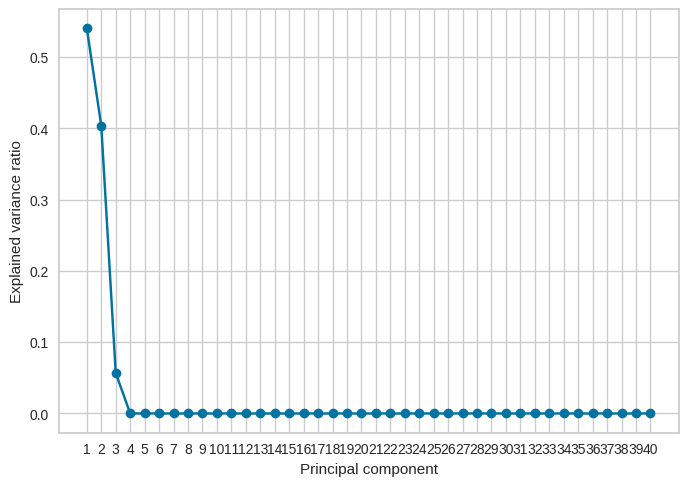

In [ ]:
# PCA object
pca = PCA()

# Fit and transform the data
X_pca = pca.fit_transform(df)

# Get the explained variance ratio of each principal component
explained_variances = pca.explained_variance_ratio_

# Print the cumulative explained variance ratio
cumulative_variances = np.cumsum(explained_variances)
print("Cumulative explained variance ratio:", cumulative_variances)

fig, ax = plt.subplots()
ax.plot(range(1, len(explained_variances)+1), explained_variances, marker='o')
ax.set_xlabel("Principal component")
ax.set_ylabel("Explained variance ratio")
ax.set_xticks(range(1, len(explained_variances)+1))
plt.show()

The output suggests that the first 4 component explains about 99% of the total variance in the data. The remaining features offer very little (1%) variance, saturating afterwards.

### **Corelation Analysis**

In [ ]:
#Absolute correlation (pos/neg)
cormat = df.corr()['Price'].apply(abs).sort_values()
cormat.shape

(40,)

In [ ]:
#Select the 10 most correlated features (Including price itself)
sf = cormat[-21:].index #min corr of abs 0.16
sf = df[sf]

Bench Test

In [ ]:
# create a list of the three models to be tested
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# split the selected features dataframe
X = sf.drop('Price', axis=1)
y = sf['Price']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# loop through the models list, fit each model on the training data, and evaluate on the testing data
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(str(model) + " R2 score: ", score)


LinearRegression() R2 score:  0.7168748321024185
DecisionTreeRegressor() R2 score:  0.7169785288871777
RandomForestRegressor() R2 score:  0.8181807008088445


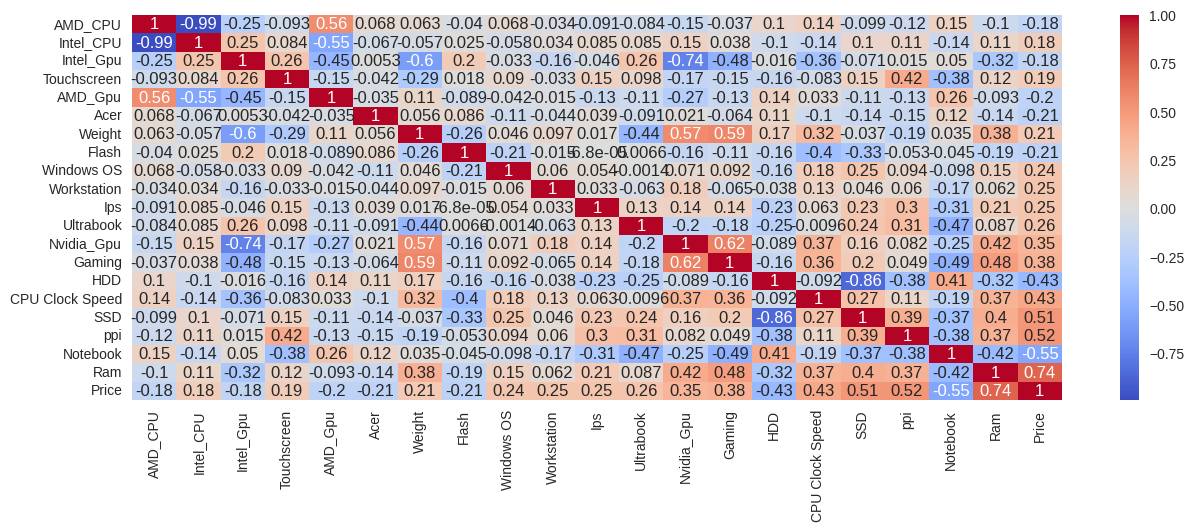

In [ ]:
# Plot correlation matrix of selected features
plt.figure(figsize=(15,5))
sns.heatmap(sf.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix of Selected Features')
plt.show()

Regression analysis assumed that there is no colinearity between features. There are some features with high colinearity.

*   HDD and SSD
*   Gaming and Nvidia_Gpu

HDD and Nvidia_Gpu is dropped

In [ ]:
#Removing colinearity
sf = sf.drop(columns=['HDD','Nvidia_Gpu'])

Performing the best test after removing colinearity

In [ ]:
# create a list of the three models to be tested
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# split the selected features dataframe
X = sf.drop('Price', axis=1)
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# loop through the models list, fit each model on the training data, and evaluate on the testing data
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(str(model) + " R2 score: ", score)

LinearRegression() R2 score:  0.7168535053326519
DecisionTreeRegressor() R2 score:  0.7163837068267156
RandomForestRegressor() R2 score:  0.8053740772846292


Removing the features offered very little improvement to the models performance

## **Selected Feature Visualization**

From this point, 'sf' is used to denote selected features and current our data frame

In [ ]:
# sf = df.drop(columns=['Brand','Type','Inches','Resolution','Cpu','Memory','Gpu','OpSys',
#                      'Pixel Width','Pixel Height','OS Group','CPU Model','Gpu Model','Memory Type'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sf_normalized = scaler.fit_transform(sf)

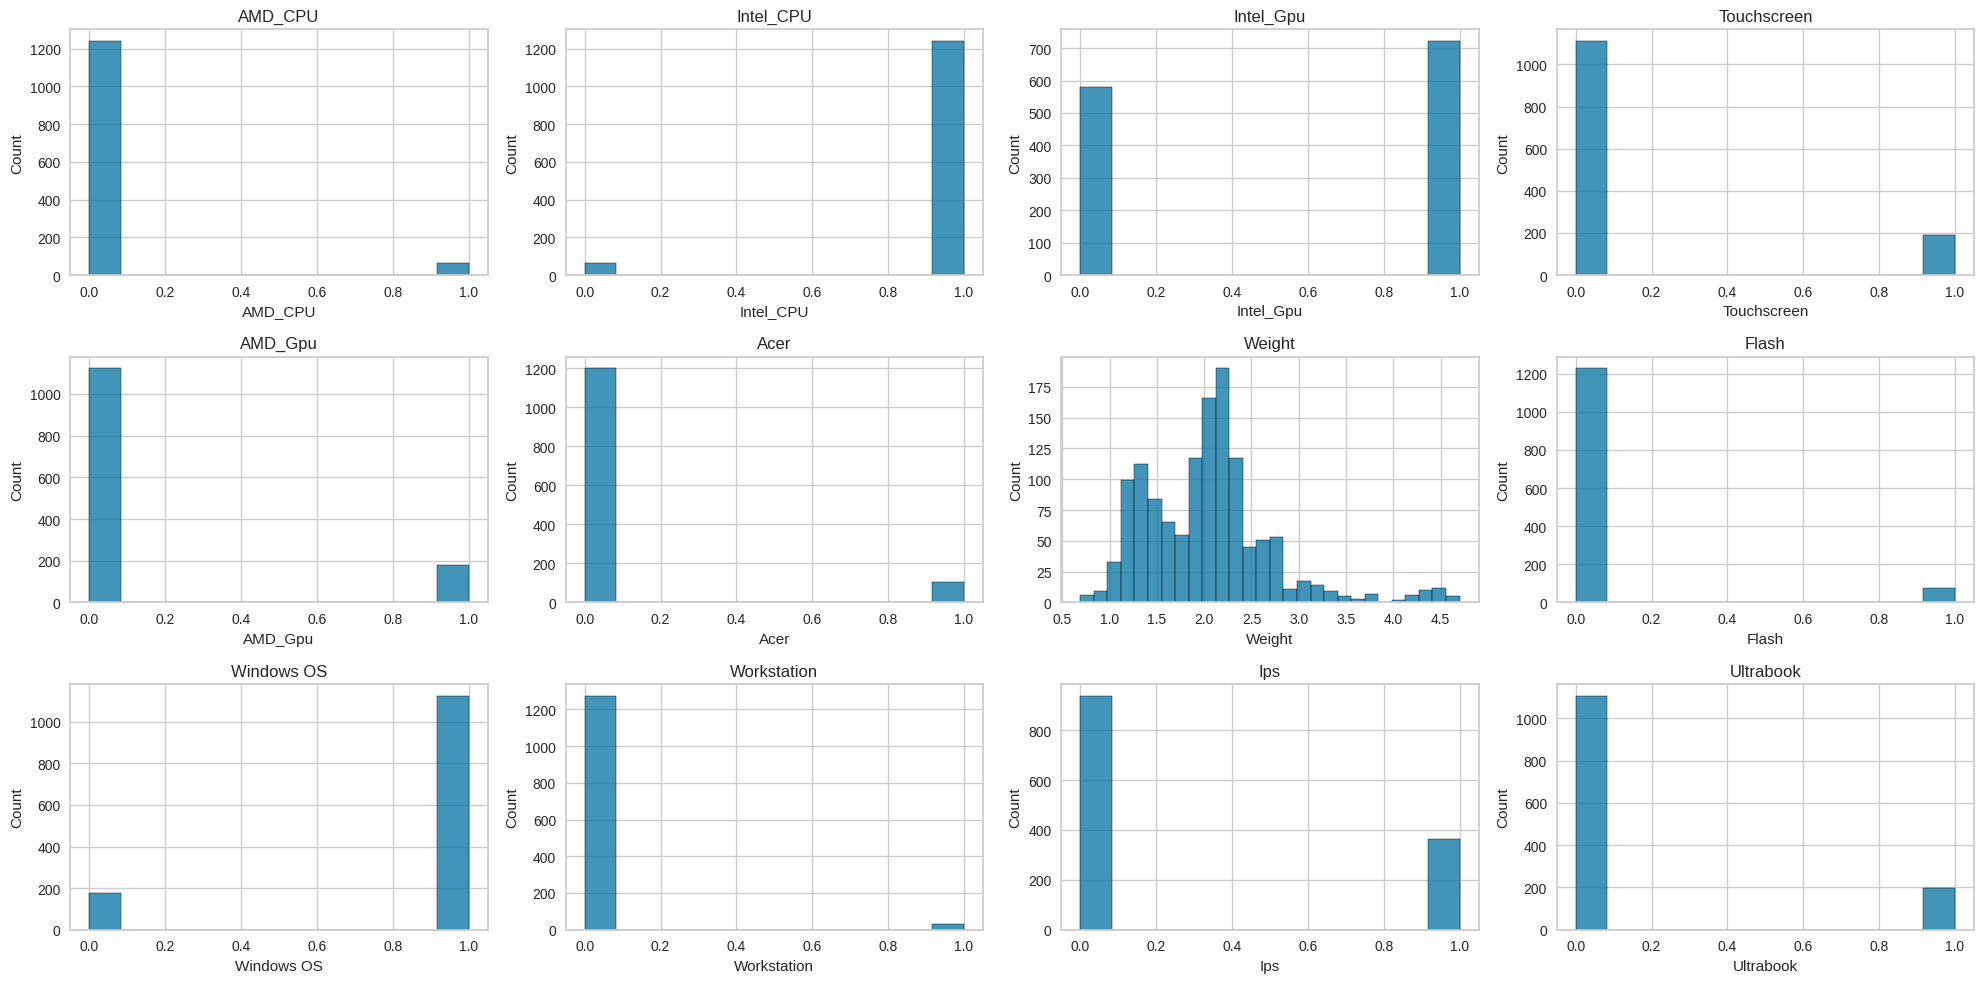

In [ ]:
#An initial view of the variables distribution
rows = 3
cols = 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20,10))

col = sf.columns
index = 0
for i in range(rows):
    for j in range(cols):
        if index < len(col):
            sns.histplot(sf[col[index]], ax=ax[i][j])
            ax[i][j].set_title(col[index])
            index += 1
        else:
            ax[i][j].set_visible(False)

plt.tight_layout()
plt.show()

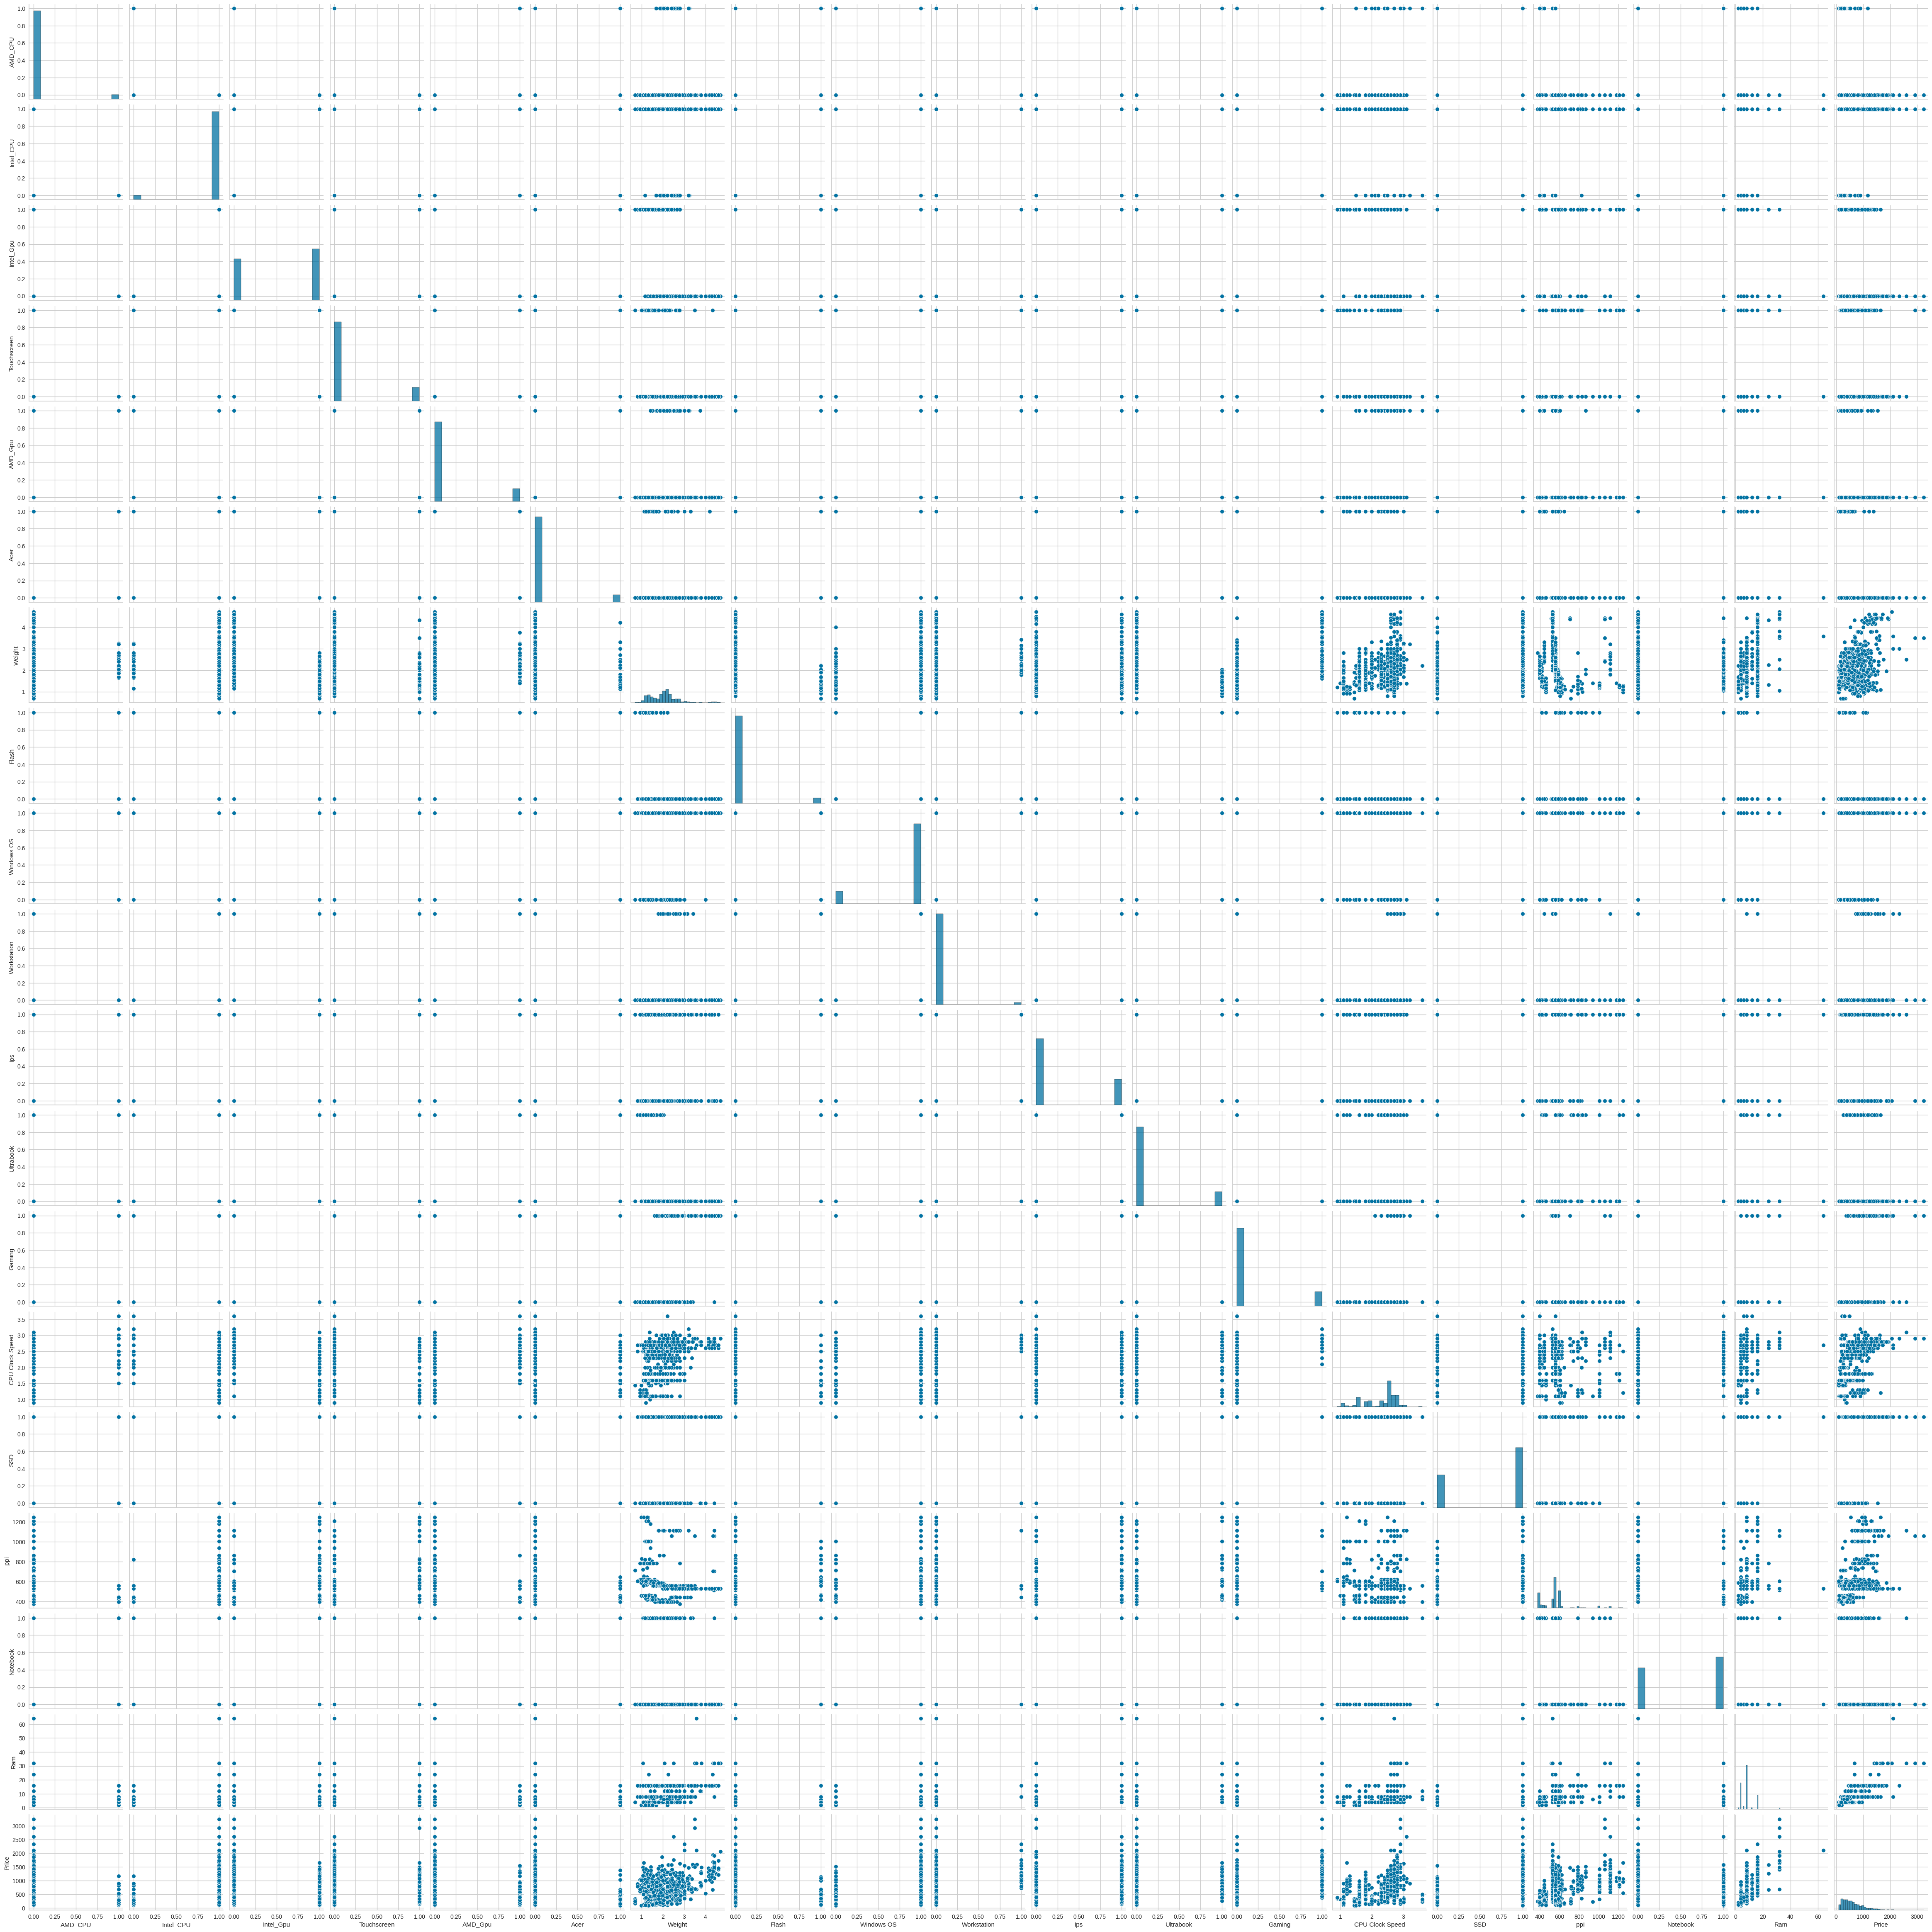

<Figure size 500x300 with 0 Axes>

In [ ]:
sns.pairplot(sf)
plt.figure(figsize=(5,3))
plt.show()

# **Model training and selection**
  

Using selected feature from the corelation analysis, the aim of this section is to identify an algorithm best suited for making prediction.

these include Linear and Logistic Regression, Random Forest regression, Decision tree Regression, Linear Discriminant Analysis, or Principal Component Regressor

Split the selected features are into training and testing sets and cross-validation is used to evaluate the performance of different models.
  
Fine-tune the hyperparameters of the selected model to optimize its performance.


## **Test Train Split**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

# sf(selected features) from correlation analysis
X = sf.drop('Price', axis=1)
y = np.log(sf['Price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% split

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1042, 18), (261, 18), (1042,), (261,))

## **Model Training**

Comaprative Analysis - Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

models = []

models.append(('SupportVector',SVR()))
models.append(('XGBoost', XGBRegressor()))
models.append(('LGBoost', LGBMRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Gradient Boost', GradientBoostingRegressor()))

#Using cross-validation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42) #10 fold did well
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s- Mean r2 score: %f || Loss:(%f)' % (name, cv_results.mean(), cv_results.std()))
    print()

SupportVector- Mean r2 score: 0.845717 || Loss:(0.032488)

XGBoost- Mean r2 score: 0.883731 || Loss:(0.019788)

LGBoost- Mean r2 score: 0.876857 || Loss:(0.029826)

RandomForest- Mean r2 score: 0.867770 || Loss:(0.036639)

Decision Tree- Mean r2 score: 0.775076 || Loss:(0.057537)

Gradient Boost- Mean r2 score: 0.856352 || Loss:(0.040469)



# **Testing/Evaluation**

While cross-validation can provide an estimate of a model's performance, the true performance of the model is ultimately determined by how well it performs on unseen data (i.e., the testing set)

Using the best 3 performing models from the comparative analysis: XGBoost, LGBoost and Random Forest

## **XGBoost**

Using GridSearch from scikit-learn for hyperparameter tuning.  XGBoost has hyperparameters such as gamma, min_child_weight, subsample, colsample_bytree, lambda, and alpha.


In [ ]:
# Define the XGBRegressor model
xgb = XGBRegressor()

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
}

# Perform a grid search over the hyperparameter search space
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print('Best Hyperparameters:', grid_search.best_params_)

Best Hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.75}


In [ ]:
# Using the best parameters from Grid Search
xgb = XGBRegressor(colsample_bytree= 0.5, learning_rate=0.1, n_estimators=200,
                   max_depth=5, subsample= 0.75)

# Fit data to the model
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate model performance on test dataset
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

print("MSE: ", xgb_mse)
print("MAE: ", xgb_mae)
print("R-squared: ", xgb_r2)

MSE:  0.04924363257431981
MAE:  0.16402039359287943
R-squared:  0.8610594623680731


**Prediction Plot**

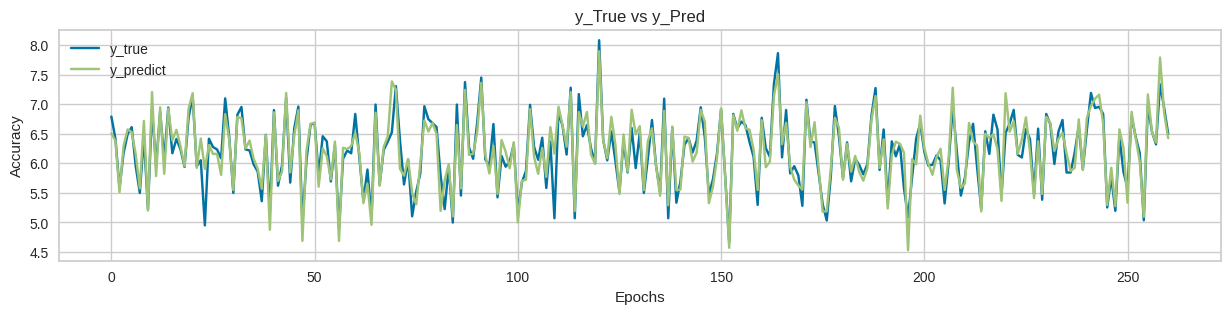

In [ ]:
plt.subplots(figsize=(15,3))

x_points = list(range(len(y_test)))

plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_pred, label='y_predict')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title ('y_True vs y_Pred')
plt.legend()
plt.show()

**Residual Plot**

Residual plot or error plot is an intepretability package from 'yellowbrick' library.
It shows the difference between the predicted values against the actual data points.


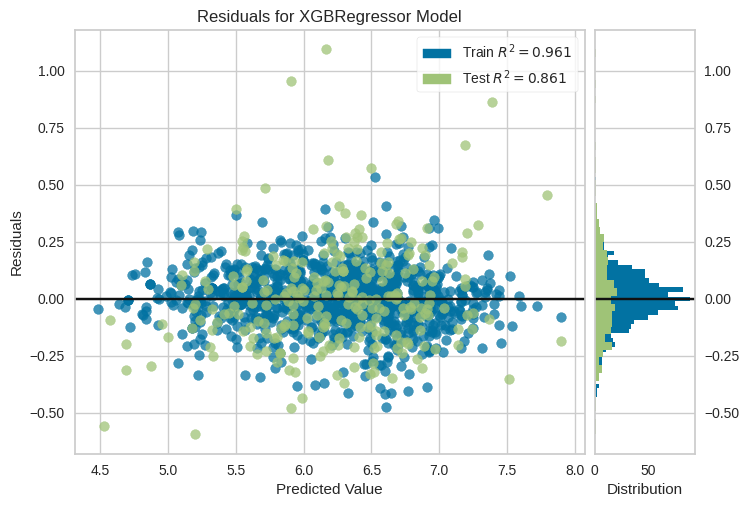

In [ ]:
from yellowbrick.regressor import ResidualsPlot
#visualizer
viz = ResidualsPlot(xgb)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

**Prediction Error Plot**

The prediction error plot shows the difference between line of best fit and the models predicted line - from yellowbrick library.

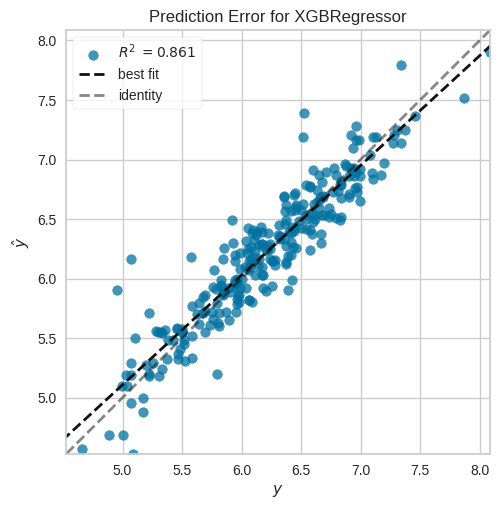

In [ ]:
from yellowbrick.regressor import PredictionError
#visualizer
viz = PredictionError(xgb)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

## **LGBM**

Using GridSearch to look for good parameters.

LGBM has hyperparameters such as num_leaves, max_bin, min_data_in_leaf, bagging_fraction, feature_fraction, lambda_l1, and lambda_l2.

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = LGBMRegressor()

# Define the hyperparameters to be tuned
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [100, 500, 1000],
    'num_leaves': [10, 30, 50],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'num_leaves': 10, 'reg_alpha': 0, 'reg_lambda': 0.1}
Best score:  0.8837560691187972


In [ ]:
# Using the best parameters from Grid Search
# lgb = LGBMRegressor(learning_rate =  0.1, max_depth =  7, n_estimators = 500, num_leaves = 10, reg_alpha = 0, reg_lambda = 0.1)

# parameters from the XGBoost model worked better here
lgb = LGBMRegressor(colsample_bytree= 0.5, learning_rate=0.1, n_estimators=200,
                   max_depth=5, subsample= 0.75)
# Fit data to the model
lgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lgb.predict(X_test)

# Evaluate model performance on test dataset
lgb_mse = mean_squared_error(y_test, y_pred)
lgb_mae = mean_absolute_error(y_test, y_pred)
lgb_r2 = r2_score(y_test, y_pred)

print("MSE: ", lgb_mse)
print("MAE: ", lgb_mae)
print("R-squared: ", lgb_r2)

MSE:  0.05036632101295546
MAE:  0.16793625985856822
R-squared:  0.857891805412186


**LGBM Prediction Plot**

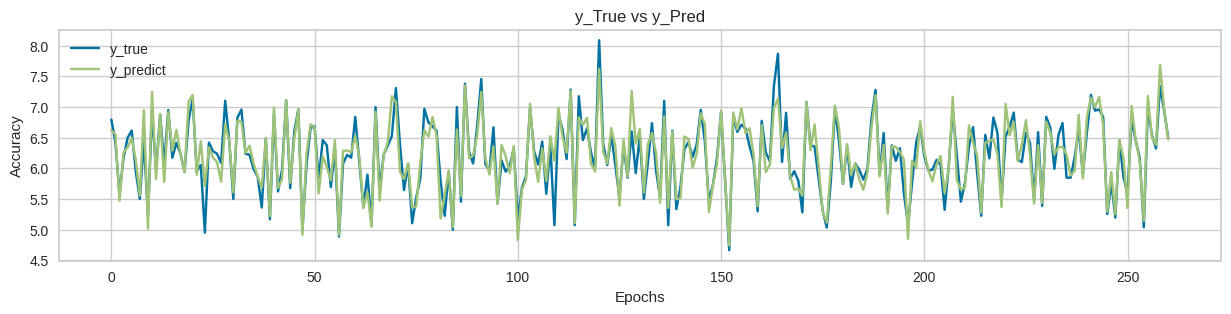

In [ ]:
plt.subplots(figsize=(15,3))
x_points = list(range(len(y_test)))

plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_pred, label='y_predict')
plt.title ('y_True vs y_Pred')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend()
plt.show()

**LGBM Residual Plot**

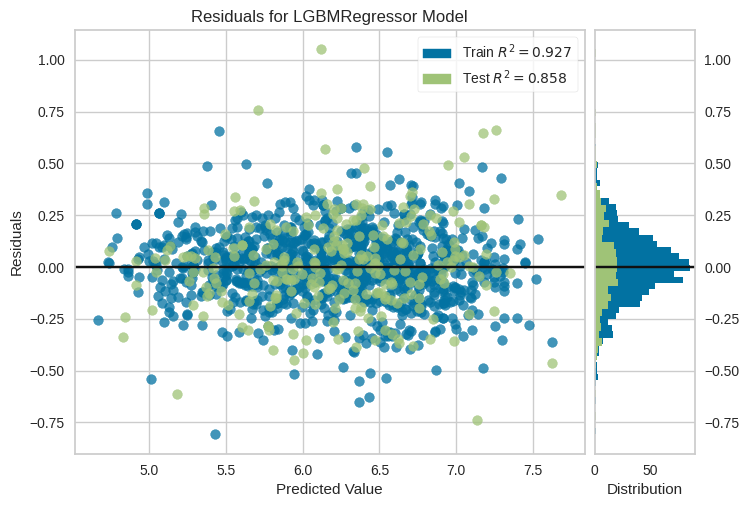

In [ ]:
from yellowbrick.regressor import ResidualsPlot
#visualizer
viz = ResidualsPlot(lgb)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

**LGBM Prediction Error**

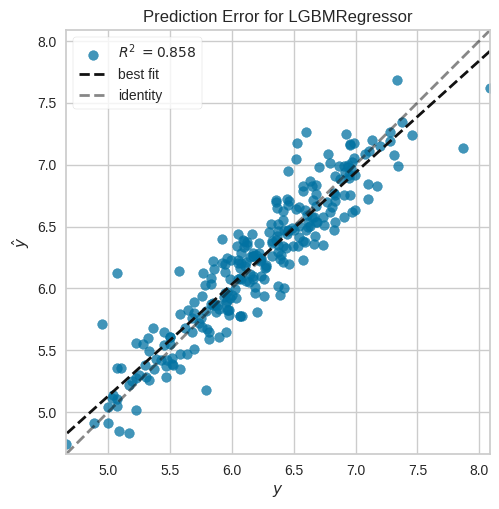

In [ ]:
from yellowbrick.regressor import PredictionError
#visualizer
viz = PredictionError(lgb)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

## **Random Forest**

Using GridSearch to identify good parameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameters to be tuned
parameters = {'n_estimators': [50, 100, 150, 200],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 15],
              'min_samples_leaf': [1, 2, 4, 8]}

# Perform Grid Search using 5-fold cross validation
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=5, n_jobs=-1)

# Fit the Grid Search object to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and their corresponding mean test score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score:  0.8723085948093464


In [ ]:
# Using the best parameters from Grid Search
rf = RandomForestRegressor(max_depth = 20, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000)

# Fit data to the model
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate model performance on test dataset
rf_mse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("MSE: ", rf_mse)
print("MAE: ", rf_mae)
print("R-squared: ", rf_r2)

MSE:  0.054392726374003865
MAE:  0.17359064115026668
R-squared:  0.8465313330761164


**Random Forest Prediction Plot**

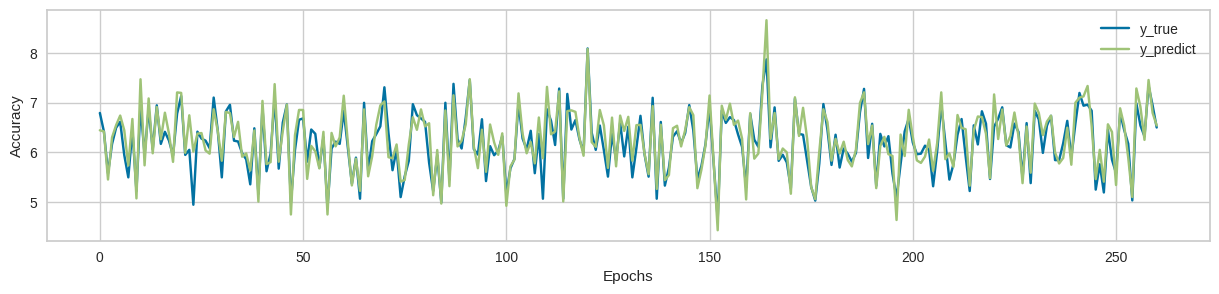

In [ ]:
plt.subplots(figsize=(15,3))
x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label='y_true')
plt.plot(x_points, y_pred, label='y_predict')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Random Forest Residual Plot**

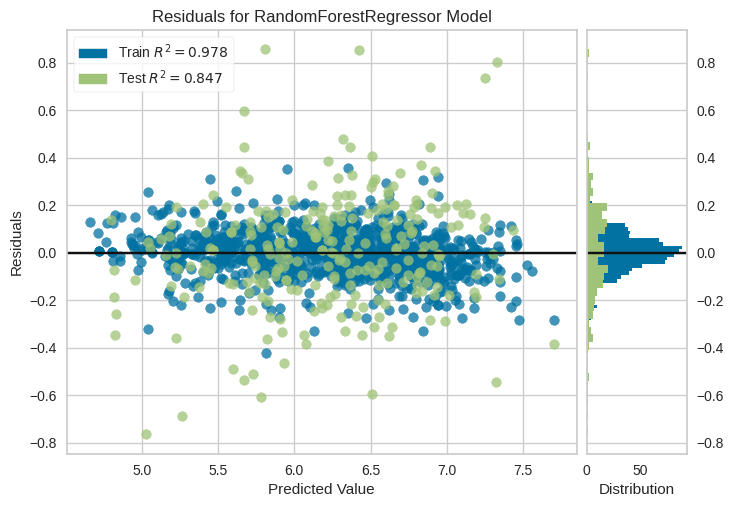

In [ ]:
from yellowbrick.regressor import ResidualsPlot
#visualizer
viz = ResidualsPlot(rf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

**Random Forest Prediction Error**

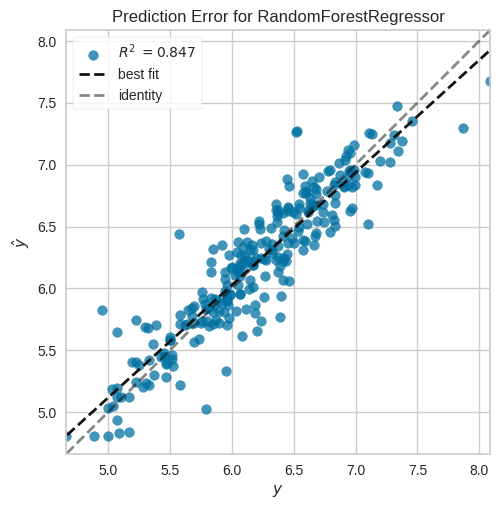

In [ ]:
from yellowbrick.regressor import PredictionError
#visualizer
viz = PredictionError(rf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

## **Voting Regressor**



Using the top 3 performing models from the cross validation step: XGBoost, LGBM, Random Forest.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor


models = []
models.append(('RF', RandomForestRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('XGBR', XGBRegressor()))

#ensemble model with voting
ensemble = VotingRegressor(estimators=models)

# Evaluate the ensemble model using cross-validation
vr_scores = cross_val_score(ensemble, X, y, cv=20, scoring='r2')

# print Accuracy
print('R2 score: %f || Loss:(%f)'% (vr_scores.mean(), vr_scores.std()))

R2 score: 0.871265 || Loss:(0.041228)


In [ ]:
#Saving the values to be called later
vr_mean = 0.871265
vr_loss= 0.041228

## **Neural Networks**

Parameter tuning using GridSearch from scikit-learn



In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import make_scorer, r2_score

# define the neural network model

# Define the Keras model to be used in GridSearchCV
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor object
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid of hyperparameters to be searched
batch_size = [16, 32, 64]
epochs = [50, 100, 150]

param_grid = dict(batch_size=batch_size, epochs=epochs)

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

#Print the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.083597 using {'batch_size': 16, 'epochs': 50}


Using EarlyStopping callback from Keras.callbacks

This is to monitor the validation loss during training and stop the training process if the validation loss stops improving.

Using Patience from EarlyStopping, we wait for the minimum number specified (as epochs) before EarlyStopping is activated.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with Adam optimizer and MSE loss function
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=100)])

# Evaluate the model on the validation set
y_pred = model.predict(X_test)
nn_mae = mean_absolute_error(y_test, y_pred)
nn_r2 = r2_score(y_test, y_pred)
print(f'MAE: {nn_mae:.2f}')
print(f'R2 Score: {nn_r2:.2f}')

9/9 [==============================] - 0s 2ms/step
MAE: 0.21
R2 Score: 0.80


Adding the Dropout function after each dense layer to randomly drop out 20% of the input units during each training step. This is to address any overfitting that may be occuring during training.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Define the neural network model || 2 dropout layers between the hidden layers to help reduce overfitting.
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model on the training set
model.fit(X_train, y_train, epochs=150, batch_size=16, verbose=0)

# Evaluate the model on the test dataset
y_pred = model.predict(X_test)
nnD_mae = mean_absolute_error(y_test, y_pred)
nnD_r2 = r2_score(y_test, y_pred)
print("MAE: ", nnD_mae)
print("R2 Score:", nnD_r2)


9/9 [==============================] - 0s 2ms/step
MAE:  0.1982487227892477
R2 Score: 0.8127465716812573


# **Conclusion**

The models imolemented in this project are:

1.   Xtreme Gradient Boost Regressor (XGBoost)
2.   Light Gradient Boost Machine Regressor (LGBM)
3.   Random Forest Regressor
4.   Voting Regressor
5.   Neural Network




In [ ]:
models_accuracy = pd.DataFrame({
        "Metrics": ["R2", "MAE"],
        "XGBoost ": [xgb_r2, xgb_mae],
        "LGBM": [lgb_r2, lgb_mae],
        "Random Forest": [rf_r2, rf_mae],
        "Voting Regressor": [vr_mean, vr_loss],
        "Neural Network": [nnD_r2, nnD_mae],})

models_accuracy.set_index("Metrics")


XGBoost       LGBM  Random Forest  Voting Regressor  Neural Network
Metrics                                                                     
R2       0.861059  0.857892       0.846531          0.871265        0.812747
MAE      0.164020  0.167936       0.173591          0.041228        0.198249

From the results achieved, it can concluded that while the tree based algorithms (XGBoost, LGBM and RandomVoting Regressor) are effective in addressing laptop price predictions, combining them into a unique ensemble offers some improvement to the overall accuracy.
